In [1]:
import pandas as pd

In [3]:
import pandas as pd
import bs4 as bs
import urllib.request
import csv
import requests
import re
from urllib.request import urlopen
from urllib.error import HTTPError

In [1]:
!pip install ijson

     ---------------------------------------- 48.9/48.9 KB 2.6 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\ayush\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
import json
import ijson

In [3]:
import json


with open('goodreads_reviews_spoiler.json') as json_file:      
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

In [6]:
df = pd.DataFrame(data)

'18245960'

In [24]:
data = []
book_checked = []
with open('goodreads_books.json', encoding='latin-1') as f:
    for line in f:
        doc = json.loads(line)
        try:
            if(doc['book_id'] in books):
                if(doc['book_id']  in book_checked):
                    continue
                else:
                    book_checked.append(doc['book_id'])
                    lst = [doc['book_id'] , doc['popular_shelves'], doc['description'] , doc['publication_year'], doc['ratings_count'] ]
                    data.append(lst)
        except:
            print('some issue' , doc)
        
            

In [25]:
cols = ['book_id', 'genre', 'description' , 'publication_year' ,'ratings_count' ]
df2 = pd.DataFrame(data=data, columns=cols)

In [26]:
df2.head()

,book_id,genre,description,publication_year,ratings_count
0,22642971,"[{'count': '9481', 'name': 'to-read'}, {'count...",The future world is at peace.\nElla Shepherd h...,2014,1525
1,32336119,"[{'count': '1755', 'name': 'to-read'}, {'count...",Ready or not...love will find a way \nSingle d...,2017,693
2,2741853,"[{'count': '2472', 'name': 'to-read'}, {'count...",This is Maddy Turner's lucky day. The civilize...,2008,3852
3,12077902,"[{'count': '34042', 'name': 'to-read'}, {'coun...",A classic work of science fiction by renowned ...,2011,252
4,7843586,"[{'count': '676', 'name': 'to-read'}, {'count'...",After a series of explosive encounters with tw...,2010,1675


In [29]:
def func(x):
    for i in x:
        if('read' in i['name'] or 'fav' in i['name'] ):
            continue
        else:
            return i['name']

In [33]:
df2['genre'] = df2['genre'].apply(func )

In [40]:
df2.to_csv('save_books.csv')

In [41]:
df.head()

,user_id,timestamp,review_sentences,rating,has_spoiler,book_id,review_id
0,8842281e1d1347389f2ab93d60773d4d,2017-08-30,"[[0, This is a special book.], [0, It started ...",5,True,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb
1,8842281e1d1347389f2ab93d60773d4d,2017-03-22,"[[0, Recommended by Don Katz.], [0, Avail for ...",3,False,16981,a5d2c3628987712d0e05c4f90798eb67
2,8842281e1d1347389f2ab93d60773d4d,2017-03-20,"[[0, A fun, fast paced science fiction thrille...",3,True,28684704,2ede853b14dc4583f96cf5d120af636f
3,8842281e1d1347389f2ab93d60773d4d,2016-11-09,"[[0, Recommended reading to understand what is...",0,False,27161156,ced5675e55cd9d38a524743f5c40996e
4,8842281e1d1347389f2ab93d60773d4d,2016-04-25,"[[0, I really enjoyed this book, and there is ...",4,True,25884323,332732725863131279a8e345b63ac33e


In [56]:
df_final = df.merge(df2, how='left' , on='book_id')

In [57]:
def func_review_join(x):
    str_rev = ''
    for i in x:
        str_rev= str_rev+i[1]
    return str_rev


In [58]:
df_final['review_sentences_join'] = df_final['review_sentences'].apply(func_review_join)

In [59]:
df_final.genre.value_counts(dropna = False)

young-adult       288147
fantasy           266190
romance           145284
fiction            98261
mystery            43829
                   ...  
need                  10
high-fantasy           9
dnf                    9
erotic-romance         9
NaN                    1
Name: genre, Length: 311, dtype: int64

In [63]:
#  Cleaning data
#remove null 
df_final = df_final.dropna(axis='rows')


In [72]:
def group_genre(x):
    if('fantasy' in x):
        return 'fantasy'
    elif('fiction' in x):
        return 'fiction'
    elif('romance' in x):
        return 'romance'
    elif('adult' in x):
        return'young-adult'
    else:
        return'other'

In [75]:
df_final['genre'] = df_final.genre.apply(group_genre)

In [76]:
df.head()

,user_id,timestamp,review_sentences,rating,has_spoiler,book_id,review_id
0,8842281e1d1347389f2ab93d60773d4d,2017-08-30,"[[0, This is a special book.], [0, It started ...",5,True,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb
1,8842281e1d1347389f2ab93d60773d4d,2017-03-22,"[[0, Recommended by Don Katz.], [0, Avail for ...",3,False,16981,a5d2c3628987712d0e05c4f90798eb67
2,8842281e1d1347389f2ab93d60773d4d,2017-03-20,"[[0, A fun, fast paced science fiction thrille...",3,True,28684704,2ede853b14dc4583f96cf5d120af636f
3,8842281e1d1347389f2ab93d60773d4d,2016-11-09,"[[0, Recommended reading to understand what is...",0,False,27161156,ced5675e55cd9d38a524743f5c40996e
4,8842281e1d1347389f2ab93d60773d4d,2016-04-25,"[[0, I really enjoyed this book, and there is ...",4,True,25884323,332732725863131279a8e345b63ac33e


In [68]:
top_genre = df_final.genre.value_counts()

In [71]:
top_genre[:10]

young-adult           288147
fantasy               266190
romance               145284
fiction                98261
mystery                43829
historical-fiction     39008
urban-fantasy          36672
m-m                    33964
science-fiction        32761
new-adult              31924
Name: genre, dtype: int64

In [79]:
df_final.head()

,user_id,timestamp,review_sentences,rating,has_spoiler,book_id,review_id,genre,description,publication_year,ratings_count,review_sentences_join
0,8842281e1d1347389f2ab93d60773d4d,2017-08-30,"[[0, This is a special book.], [0, It started ...",5,True,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,other,The Three-Body Problemis the first chance for ...,2014,6336,This is a special book.It started slow for abo...
1,8842281e1d1347389f2ab93d60773d4d,2017-03-22,"[[0, Recommended by Don Katz.], [0, Avail for ...",3,False,16981,a5d2c3628987712d0e05c4f90798eb67,other,First published in 1952 and immediately hailed...,1995,125232,Recommended by Don Katz.Avail for free in Dece...
2,8842281e1d1347389f2ab93d60773d4d,2017-03-20,"[[0, A fun, fast paced science fiction thrille...",3,True,28684704,2ede853b14dc4583f96cf5d120af636f,fiction,"""Are you happy with your life?""\nThose are the...",2016,13990,"A fun, fast paced science fiction thriller.I r..."
3,8842281e1d1347389f2ab93d60773d4d,2016-11-09,"[[0, Recommended reading to understand what is...",0,False,27161156,ced5675e55cd9d38a524743f5c40996e,fiction,From a former Marine and Yale Law School Gradu...,2016,99022,Recommended reading to understand what is goin...
4,8842281e1d1347389f2ab93d60773d4d,2016-04-25,"[[0, I really enjoyed this book, and there is ...",4,True,25884323,332732725863131279a8e345b63ac33e,fiction,A major new novel from one of science fiction'...,,1659,"I really enjoyed this book, and there is a lot..."


In [77]:
df_final.to_csv('Final_merge_spiler.csv')

In [7]:
df2 = pd.DataFrame(data)

In [7]:
del data

In [9]:
del df2

In [8]:
books = df.book_id.unique()

In [ ]:
del df

In [11]:
books

array(['18245960', '16981', '28684704', ..., '12997592', '12323895',
       '16148398'], dtype=object)

In [14]:
f = open('goodreads_books.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

JSONDecodeError: Extra data: line 2 column 1 (char 1050)

In [16]:
f.close()

In [8]:
# genre_dic = {}
import time


for book_id in books:
  if(book_id in genre_dic):
    continue
  my_urls = 'https://www.goodreads.com/book/show/' + book_id

  source = urlopen(my_urls).read()
  time.sleep(5)
  soup = bs.BeautifulSoup(source)
  text_cdata = ' '.join(soup.find_all(text=True))
  genres = re.findall(r'shelf",(.*?)\)', text_cdata)
  try:
    genre_dic[book_id] = eval(genres[0])

  except:
    print('Failed For -----------------------',book_id)
  

KeyboardInterrupt: 

In [ ]:
with open("genre2.json", "w") as outfile:
    json.dump(genre_dic, outfile)

# EDA

In [80]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378032 entries, 0 to 1378032
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   user_id                1378032 non-null  object
 1   timestamp              1378032 non-null  object
 2   review_sentences       1378032 non-null  object
 3   rating                 1378032 non-null  int64 
 4   has_spoiler            1378032 non-null  bool  
 5   book_id                1378032 non-null  object
 6   review_id              1378032 non-null  object
 7   genre                  1378032 non-null  object
 8   description            1378032 non-null  object
 9   publication_year       1378032 non-null  object
 10  ratings_count          1378032 non-null  object
 11  review_sentences_join  1378032 non-null  object
dtypes: bool(1), int64(1), object(10)
memory usage: 127.5+ MB


In [81]:
df_final.user_id.nunique()

18892

In [84]:
spoiler_dist = df_final.has_spoiler.value_counts()/len(df_final) *100

<AxesSubplot:>

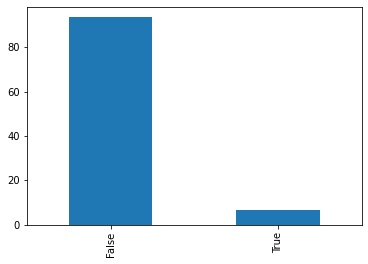

In [88]:
spoiler_dist.plot.bar()

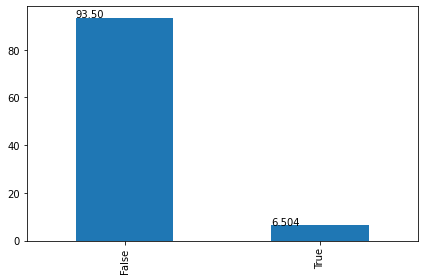

In [93]:
import matplotlib.pyplot as plt
from decimal import Decimal
ax = spoiler_dist.plot(x=spoiler_dist.index, y=spoiler_dist.values, kind='bar')
for p in ax.patches:
    ax.annotate('{:.4}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.tight_layout()
plt.show()

In [106]:
pub = df_final.publication_year.value_counts()

In [109]:
pub = pub[:10]

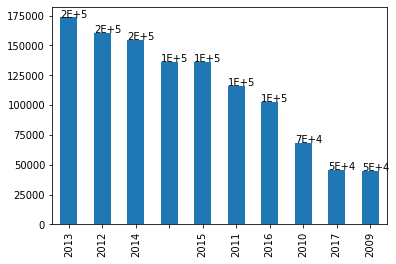

In [110]:

ax = pub.plot(x=pub.index, y=pub.values, kind='bar')
for p in ax.patches:
    ax.annotate('{:.1}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))



plt.show()

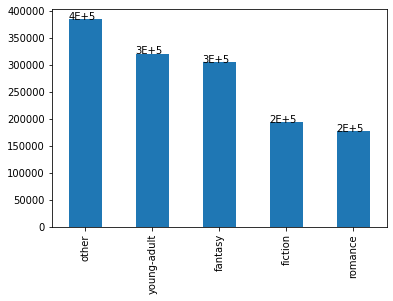

In [104]:
pub = df_final.genre.value_counts()
ax = pub.plot(x=pub.index, y=pub.values, kind='bar')
for p in ax.patches:
    ax.annotate('{:.1}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))



plt.show()

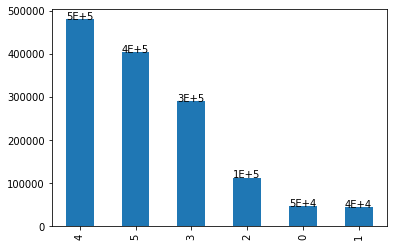

In [114]:
pub = df_final.rating.value_counts()
ax = pub.plot(x=pub.index, y=pub.values, kind='bar')
for p in ax.patches:
    ax.annotate('{:.1}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))



plt.show()

In [120]:
 df_final.ratings_count

0            6336
1          125232
2           13990
3           99022
4            1659
            ...  
1378028    135482
1378029      2370
1378030     69293
1378031    318750
1378032    227617
Name: ratings_count, Length: 1378032, dtype: object

In [4]:

df_final = pd.read_csv('merged_spoiler.csv')

In [8]:
df_final[df_final.isna().any(axis=1)]
#drop publication year

,user_id,timestamp,review_sentences,rating,has_spoiler,book_id,review_id,genre,description,publication_year,ratings_count,review_sentences_join
4,8842281e1d1347389f2ab93d60773d4d,2016-04-25,"[[0, 'I really enjoyed this book, and there is...",4,True,25884323,332732725863131279a8e345b63ac33e,fiction,A major new novel from one of science fiction'...,NaN,1659,"I really enjoyed this book, and there is a lot..."
18,8842281e1d1347389f2ab93d60773d4d,2014-01-10,"[[0, 'The Circle is a new bay area company, bu...",4,False,18659415,4e652faa682edfcb0c0e1effdd1f8e58,fiction,The Circleis the exhilarating new novel from D...,NaN,10458,"The Circle is a new bay area company, but is r..."
32,8842281e1d1347389f2ab93d60773d4d,2017-03-22,"[[0, '** spoiler alert **'], [0, 'Critics asid...",3,False,6411961,d44b6d28f456dbcc5b1537b4c5572400,fiction,WHAT IS LOST...\nWILL BE FOUND\nIn this stunni...,NaN,377017,"** spoiler alert **Critics aside, Dan Brown ca..."
47,8842281e1d1347389f2ab93d60773d4d,2017-03-22,"[[0, ""Loved every second, and didn't want it t...",5,False,119322,111b958d9d8b5132be5e0c63399d1839,fantasy,Here lives an orphaned ward named Lyra Belacqu...,NaN,973154,"Loved every second, and didn't want it to end,..."
50,8842281e1d1347389f2ab93d60773d4d,2017-03-22,"[[0, ""I'm not sure if I love Khaled's characte...",5,False,128029,172eea9d13272fc7ae6c34ca356496bc,fiction,At once an incredible chronicle of thirty year...,NaN,835172,I'm not sure if I love Khaled's characters (se...
...,...,...,...,...,...,...,...,...,...,...,...,...
1377935,4520da81e308f4f60047d43d69d3c39d,2017-02-17,"[[0, ""I have to say that this isn't a book I'd...",5,False,27362503,0e6dab8caab646ef4a8e815ea668a6ad,romance,SOMETIMES THE ONE WHO LOVES YOU IS THE ONE WHO...,NaN,88278,I have to say that this isn't a book I'd norma...
1377951,e32792a55ef11527453a96a9df5a4fc2,2017-09-19,"[[0, ""I don't know why it took me so much time...",4,False,1933181,e35c5645cf248bc011e54e13feeeeb72,fiction,Following the tremendous success of her first ...,NaN,20560,I don't know why it took me so much time to re...
1377988,e32792a55ef11527453a96a9df5a4fc2,2017-05-11,"[[0, 'This was an interesting reading experien...",3,True,11333587,1f0e2fab064b03f22baffd6579641000,fiction,"It's the year 2044, and the real world is an u...",NaN,1091,This was an interesting reading experience.For...
1377999,e32792a55ef11527453a96a9df5a4fc2,2017-01-14,"[[0, ""I've just started, but I have to say I'm...",4,False,9460487,c510f095a02e00300ccbd2475f78a790,fantasy,A mysterious island. An abandoned orphanage. A...,NaN,641884,"I've just started, but I have to say I'm impre..."


In [14]:
# null descriptions or no descriptions
len(df_final[df_final['description'].isna()])


7045

In [17]:
df_final['description'].fillna('' , inplace = True)

In [18]:
len_desc = df_final['description'].apply(lambda x : len(x))

In [19]:
len_desc

0           679
1           973
2          1260
3          1550
4           349
           ... 
1378027     424
1378028    1108
1378029     627
1378030    1593
1378031    1079
Name: description, Length: 1378032, dtype: int64

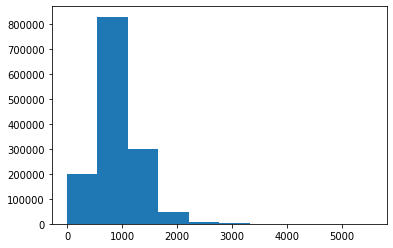

In [23]:
import matplotlib.pyplot as plt
plt.hist(len_desc)
# show plot
plt.show()

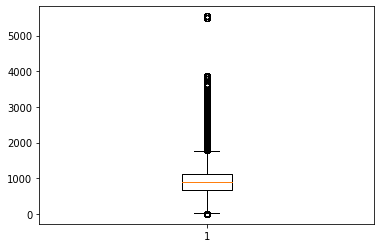

In [24]:
plt.boxplot(len_desc)
# show plot
plt.show()

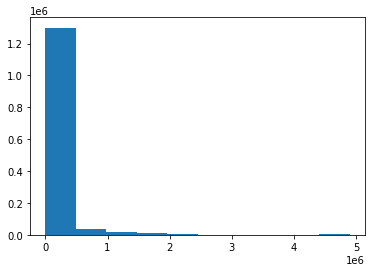

In [26]:
plt.hist(df_final['ratings_count'])
# show plot
plt.show()

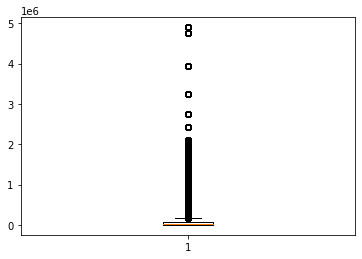

In [27]:
plt.boxplot(df_final['ratings_count'])
# show plot
plt.show()

In [28]:
df_final.describe()

,rating,book_id,publication_year,ratings_count
count,1.378032e+06,1.378032e+06,1.241707e+06,1.378032e+06
mean,3.685078e+00,1.335895e+07,2.011079e+03,1.238979e+05
std,1.252455e+00,9.260207e+06,1.007271e+01,3.930010e+05
min,0.000000e+00,1.000000e+00,1.600000e+01,1.700000e+01
25%,3.000000e+00,6.393872e+06,2.010000e+03,4.166000e+03
50%,4.000000e+00,1.336254e+07,2.012000e+03,1.636100e+04
75%,5.000000e+00,2.029968e+07,2.014000e+03,6.995500e+04
max,5.000000e+00,3.632868e+07,2.089000e+03,4.899965e+06


In [30]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378032 entries, 0 to 1378031
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   user_id                1378032 non-null  object 
 1   timestamp              1378032 non-null  object 
 2   review_sentences       1378032 non-null  object 
 3   rating                 1378032 non-null  int64  
 4   has_spoiler            1378032 non-null  bool   
 5   book_id                1378032 non-null  int64  
 6   review_id              1378032 non-null  object 
 7   genre                  1378032 non-null  object 
 8   description            1378032 non-null  object 
 9   publication_year       1241707 non-null  float64
 10  ratings_count          1378032 non-null  int64  
 11  review_sentences_join  1378032 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 117.0+ MB


<AxesSubplot:xlabel='genre', ylabel='Count'>

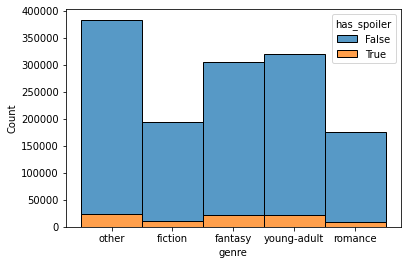

In [33]:
# Bivariate analysis
# genre and target
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(binwidth=0.5, x="genre", hue="has_spoiler", data=df_final, stat="count", multiple="stack")

<AxesSubplot:xlabel='rating', ylabel='Count'>

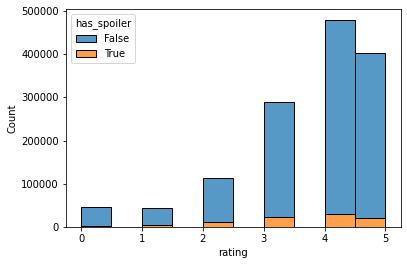

In [34]:
sns.histplot(binwidth=0.5, x="rating", hue="has_spoiler", data=df_final, stat="count", multiple="stack")